In [133]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from matplotlib import rcParams
from cycler import cycler

In [3]:
df = pd.read_csv(r'C:\Users\moral\Documents\Master Ciencia de Datos\Semestre 4\Visualizacion de datos\PEC 2\PerthTemperatures.csv')

In [4]:
df


,Year,Month,Day,Minimum temperature (Degree C),Maximum temperature (Degree C),Rainfall amount (millimetres),Quality
0,1944.0,6.0,3.0,11.0,22.3,0.0,N
1,1944.0,6.0,4.0,12.2,23.4,0.0,Y
2,1944.0,6.0,5.0,12.0,20.3,2.0,Y
3,1944.0,6.0,6.0,7.4,18.7,3.3,Y
4,1944.0,6.0,7.0,5.9,21.3,0.3,Y
...,...,...,...,...,...,...,...
27642,2020.0,2.0,7.0,20.7,30.6,0.0,N
27643,2020.0,2.0,8.0,19.6,28.2,0.0,N
27644,2020.0,2.0,9.0,14.1,29.8,0.0,N
27645,2020.0,2.0,10.0,15.2,33.0,0.0,N


In [5]:
df1 = df.dropna()

In [69]:
df1 = df1[df1['Year'] >= 1950]
df.reset_index(inplace=True)

In [75]:
df1

,Year,Month,Day,Minimum temperature (Degree C),Maximum temperature (Degree C),Rainfall amount (millimetres),Quality,Década
2038,1950.0,1.0,1.0,20.9,36.8,0.0,Y,NaN
2039,1950.0,1.0,2.0,19.7,41.0,0.0,Y,NaN
2040,1950.0,1.0,3.0,22.4,35.3,0.0,Y,NaN
2041,1950.0,1.0,4.0,16.1,25.7,0.8,Y,NaN
2042,1950.0,1.0,5.0,13.7,24.9,1.5,Y,NaN
...,...,...,...,...,...,...,...,...
27641,2020.0,2.0,6.0,21.0,32.6,0.0,N,NaN
27642,2020.0,2.0,7.0,20.7,30.6,0.0,N,NaN
27643,2020.0,2.0,8.0,19.6,28.2,0.0,N,NaN
27644,2020.0,2.0,9.0,14.1,29.8,0.0,N,NaN


In [76]:
df2 = pd.pivot_table(data=df1, index=['Year'], values=['Maximum temperature (Degree C)',
                                                'Minimum temperature (Degree C)',
                                               'Rainfall amount (millimetres)'], aggfunc='mean')

In [77]:
df2['Maximum temperature (Degree C)'] = df2['Maximum temperature (Degree C)'].round(decimals = 1)
df2['Minimum temperature (Degree C)'] = df2['Minimum temperature (Degree C)'].round(decimals = 1)
df2['Rainfall amount (millimetres)'] = df2['Rainfall amount (millimetres)'].round(decimals = 1)
df2.rename(columns={'Maximum temperature (Degree C)': 'Máximas', 'Minimum temperature (Degree C)': 'Mínimas',
           'Rainfall amount (millimetres)': 'Lluvia'}, inplace=True)

In [78]:
df2.index = df2.index.astype("int")

In [79]:
df2.dtypes

Máximas    float64
Mínimas    float64
Lluvia     float64
dtype: object

In [80]:
df2

,Máximas,Mínimas,Lluvia
Year,,,
1950,24.2,11.3,2.2
1951,23.2,10.8,2.2
1952,23.6,10.9,2.5
1953,23.4,11.0,2.4
1954,23.8,10.5,1.9
...,...,...,...
2016,24.4,12.0,1.8
2017,25.3,12.6,2.0
2018,25.1,12.5,2.0


In [103]:
df1['Década'] = pd.cut(x=df1['Year'], bins=[1949,1960,1970,1980,1990,2000,2010,2021],labels=['50s','60s','70s','80s','90s','00s','10s'])

In [104]:
df1.rename(columns={'Maximum temperature (Degree C)': 'Máximas', 'Minimum temperature (Degree C)': 'Mínimas',
           'Rainfall amount (millimetres)': 'Lluvia'}, inplace=True)
df1

,Year,Month,Day,Mínimas,Máximas,Lluvia,Quality,Década
2038,1950.0,1.0,1.0,20.9,36.8,0.0,Y,50s
2039,1950.0,1.0,2.0,19.7,41.0,0.0,Y,50s
2040,1950.0,1.0,3.0,22.4,35.3,0.0,Y,50s
2041,1950.0,1.0,4.0,16.1,25.7,0.8,Y,50s
2042,1950.0,1.0,5.0,13.7,24.9,1.5,Y,50s
...,...,...,...,...,...,...,...,...
27641,2020.0,2.0,6.0,21.0,32.6,0.0,N,10s
27642,2020.0,2.0,7.0,20.7,30.6,0.0,N,10s
27643,2020.0,2.0,8.0,19.6,28.2,0.0,N,10s
27644,2020.0,2.0,9.0,14.1,29.8,0.0,N,10s


In [105]:
df1['Década'].value_counts()

50s    4003
00s    3652
80s    3650
90s    3648
70s    3635
60s    3627
10s    3327
Name: Década, dtype: int64

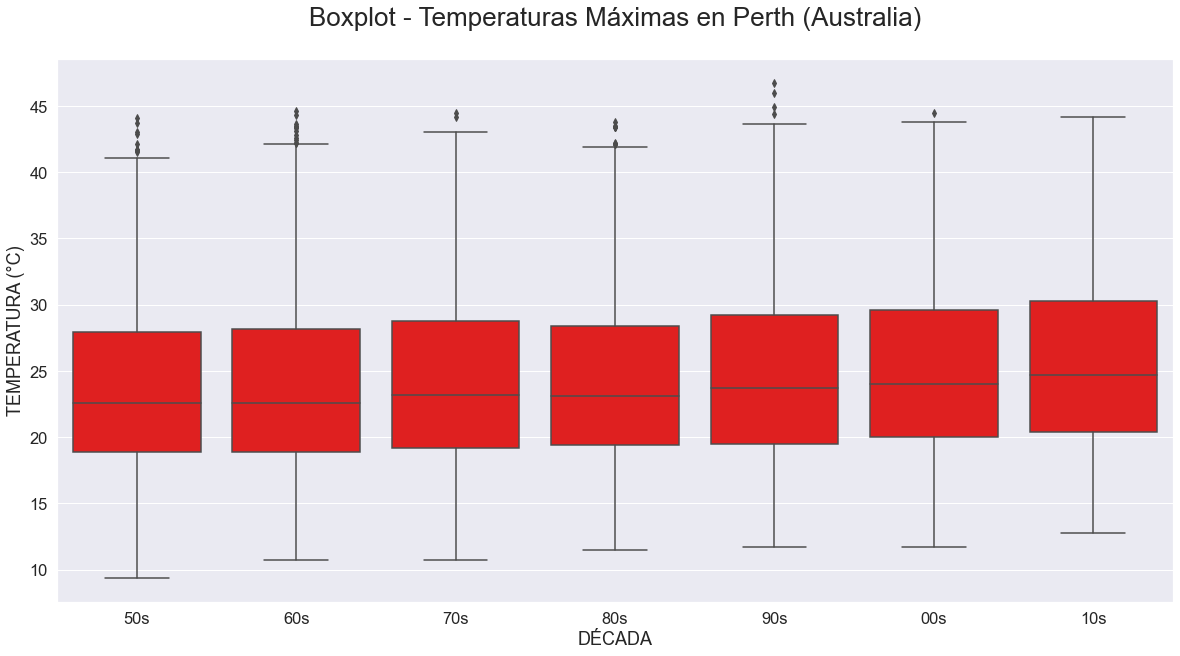

In [154]:
ax = sns.boxplot(data=df1, x='Década', y='Máximas',color='red')
rcParams['figure.figsize'] = 20,10
ax.set(xlabel='DÉCADA', ylabel='TEMPERATURA (°C)')
sns.set(font_scale=1.5)
plt.title('Boxplot - Temperaturas Máximas en Perth (Australia)', fontsize = 26, x=0.5, y=1.05)
plt.show()


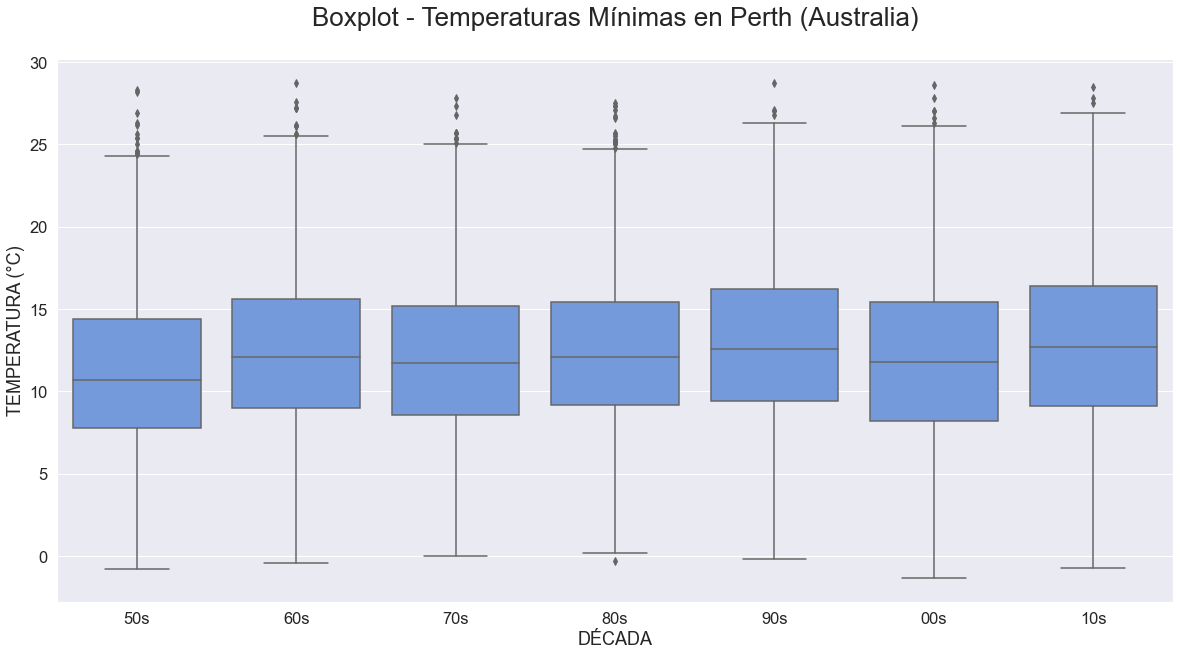

In [152]:
ax = sns.boxplot(data=df1, x='Década', y='Mínimas',color='cornflowerblue')
rcParams['figure.figsize'] = 20,10
ax.set(xlabel='DÉCADA', ylabel='TEMPERATURA (°C)')
sns.set(font_scale=1.5)
plt.title('Boxplot - Temperaturas Mínimas en Perth (Australia)', fontsize = 26, x=0.5, y=1.05)
plt.show()

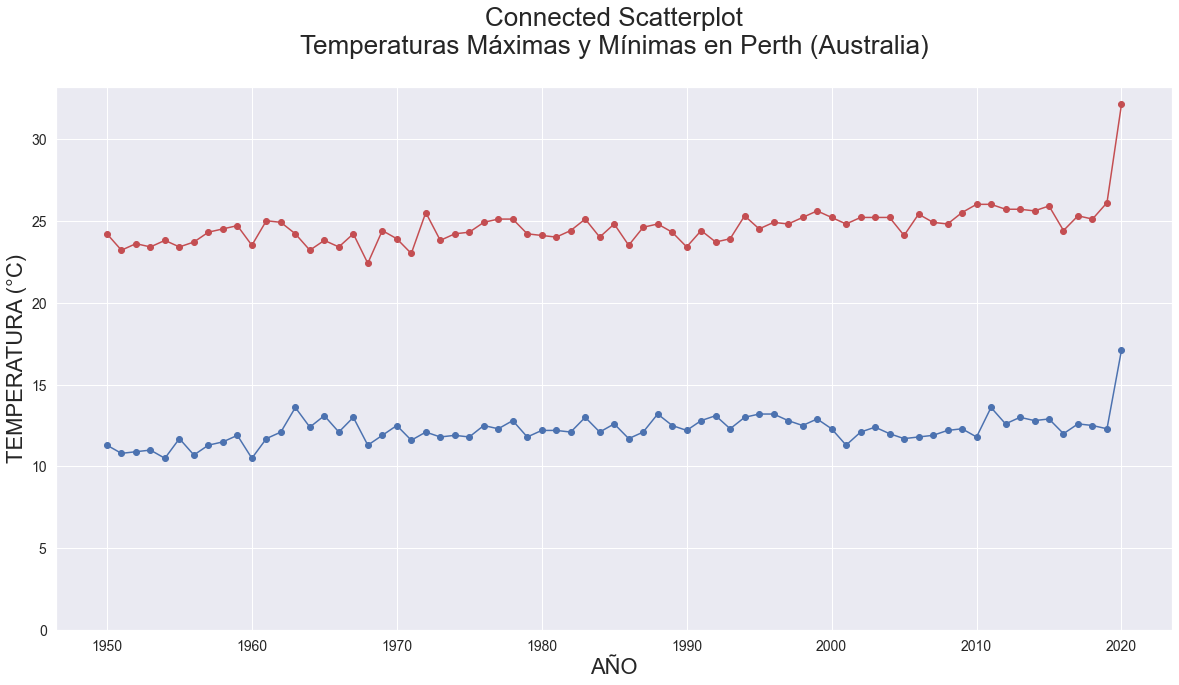

In [170]:
plt.plot(df2.index, df2['Máximas'], '-o')
plt.plot(df2.index, df2['Mínimas'], '-o')
plt.ylim(bottom=0)
plt.rc('axes', prop_cycle=(cycler('color', ['r', 'b'])))
plt.title('Connected Scatterplot\nTemperaturas Máximas y Mínimas en Perth (Australia)', fontsize = 26, x=0.5, y=1.05)
plt.xlabel('AÑO', fontsize = 22)
ax.xaxis.set_label_coords(0.5, -0.1)
plt.ylabel('TEMPERATURA (°C)', fontsize = 22)
ax.yaxis.set_label_coords(-0.05, 0.5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()